In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

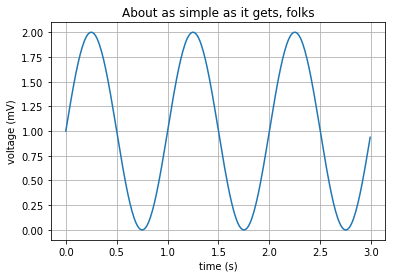

In [7]:
t = np.arange(0.0, 3.0, 0.01)
s = 1 + np.sin(2*np.pi*t)
plt.plot(t, s)

plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('About as simple as it gets, folks')
plt.grid(True)
plt.savefig("test.png")
plt.show()

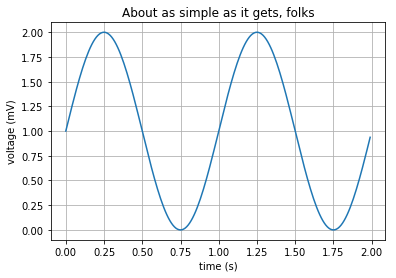

In [8]:
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2*np.pi*t)
plt.plot(t, s)

plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('About as simple as it gets, folks')
plt.grid(True)
plt.savefig("test.png")
plt.show() 

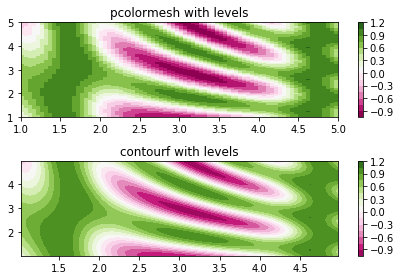

In [9]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np


# make these smaller to increase the resolution
dx, dy = 0.05, 0.05

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(1, 5 + dy, dy),
                slice(1, 5 + dx, dx)]

z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())


# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, (ax0, ax1) = plt.subplots(nrows=2)

im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')


# contours are *point* based plots, so convert our bound into point
# centers
cf = ax1.contourf(x[:-1, :-1] + dx/2.,
                  y[:-1, :-1] + dy/2., z, levels=levels,
                  cmap=cmap)
fig.colorbar(cf, ax=ax1)
ax1.set_title('contourf with levels')

# adjust spacing between subplots so `ax1` title and `ax0` tick labels
# don't overlap
fig.tight_layout()

plt.show()

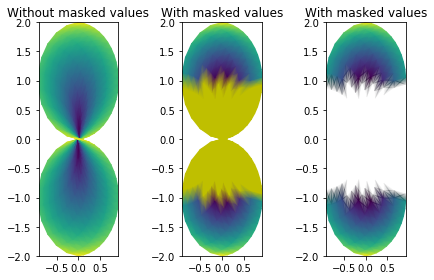

In [10]:
import copy

from matplotlib import cm, pyplot as plt
import numpy as np

n = 12
x = np.linspace(-1.5, 1.5, n)
y = np.linspace(-1.5, 1.5, n * 2)
X, Y = np.meshgrid(x, y)
Qx = np.cos(Y) - np.cos(X)
Qz = np.sin(Y) + np.sin(X)
Z = np.sqrt(X**2 + Y**2) / 5
Z = (Z - Z.min()) / (Z.max() - Z.min())

# The color array can include masked values.
Zm = np.ma.masked_where(np.abs(Qz) < 0.5 * np.max(Qz), Z)

fig, axs = plt.subplots(nrows=1, ncols=3)
axs[0].pcolormesh(Qx, Qz, Z, shading='gouraud')
axs[0].set_title('Without masked values')

# You can control the color of the masked region. We copy the default colormap
# before modifying it.
cmap = copy.copy(cm.get_cmap(plt.rcParams['image.cmap']))
cmap.set_bad('y', 1.0)
axs[1].pcolormesh(Qx, Qz, Zm, shading='gouraud', cmap=cmap)
axs[1].set_title('With masked values')

# Or use the default, which is transparent.
axs[2].pcolormesh(Qx, Qz, Zm, shading='gouraud')
axs[2].set_title('With masked values')

fig.tight_layout()
plt.show()